# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

In [1]:
import pandas as pd

df=pd.read_csv("online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

# Object and Motivation 

My main objetives are to to develop a Cohort Analysis an a Cluster Segmentation of Clients according to a RFM model. 
RFM stands for Recency-Frequency-Monetary. 
* Recency: How much time has elapsed since a customer’s last activity or transaction with the brand? Activity is usually a purchase, although variations are sometimes used, e.g., the last visit to a website or use of a mobile app. In most cases, the more recently a customer has interacted or transacted with a brand, the more likely that customer will be responsive to communications from the brand.
* Frequency: How often has a customer transacted or interacted with the brand during a particular period of time? Clearly, customers with frequent activities are more engaged, and probably more loyal, than customers who rarely do so. And one-time-only customers are in a class of their own.
* Monetary: Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time. Big spenders should usually be treated differently than customers who spend little. Looking at monetary divided by frequency indicates the average purchase amount – an important secondary factor to consider when segmenting customers.


# Exploratory Data Analysis and Cleaning Process

## Basic Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline

## Data types

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Statistics Description

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


***Observation:*** There are negative quantities and negative prices. This quantities are mostly asociated with cancelled orders

In [5]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/11 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [6]:
df['Country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

***Observation:*** 91.4 % of the orders are from UK

## Duplicated Values Check

In [7]:
# Make a Copy of the dataset
df1=df.copy()

In [8]:
print(sum(df1.duplicated(keep="first")),"rows affected")

5268 rows affected


In [9]:
df1=df1.drop_duplicates()

## Completeness check

In [10]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

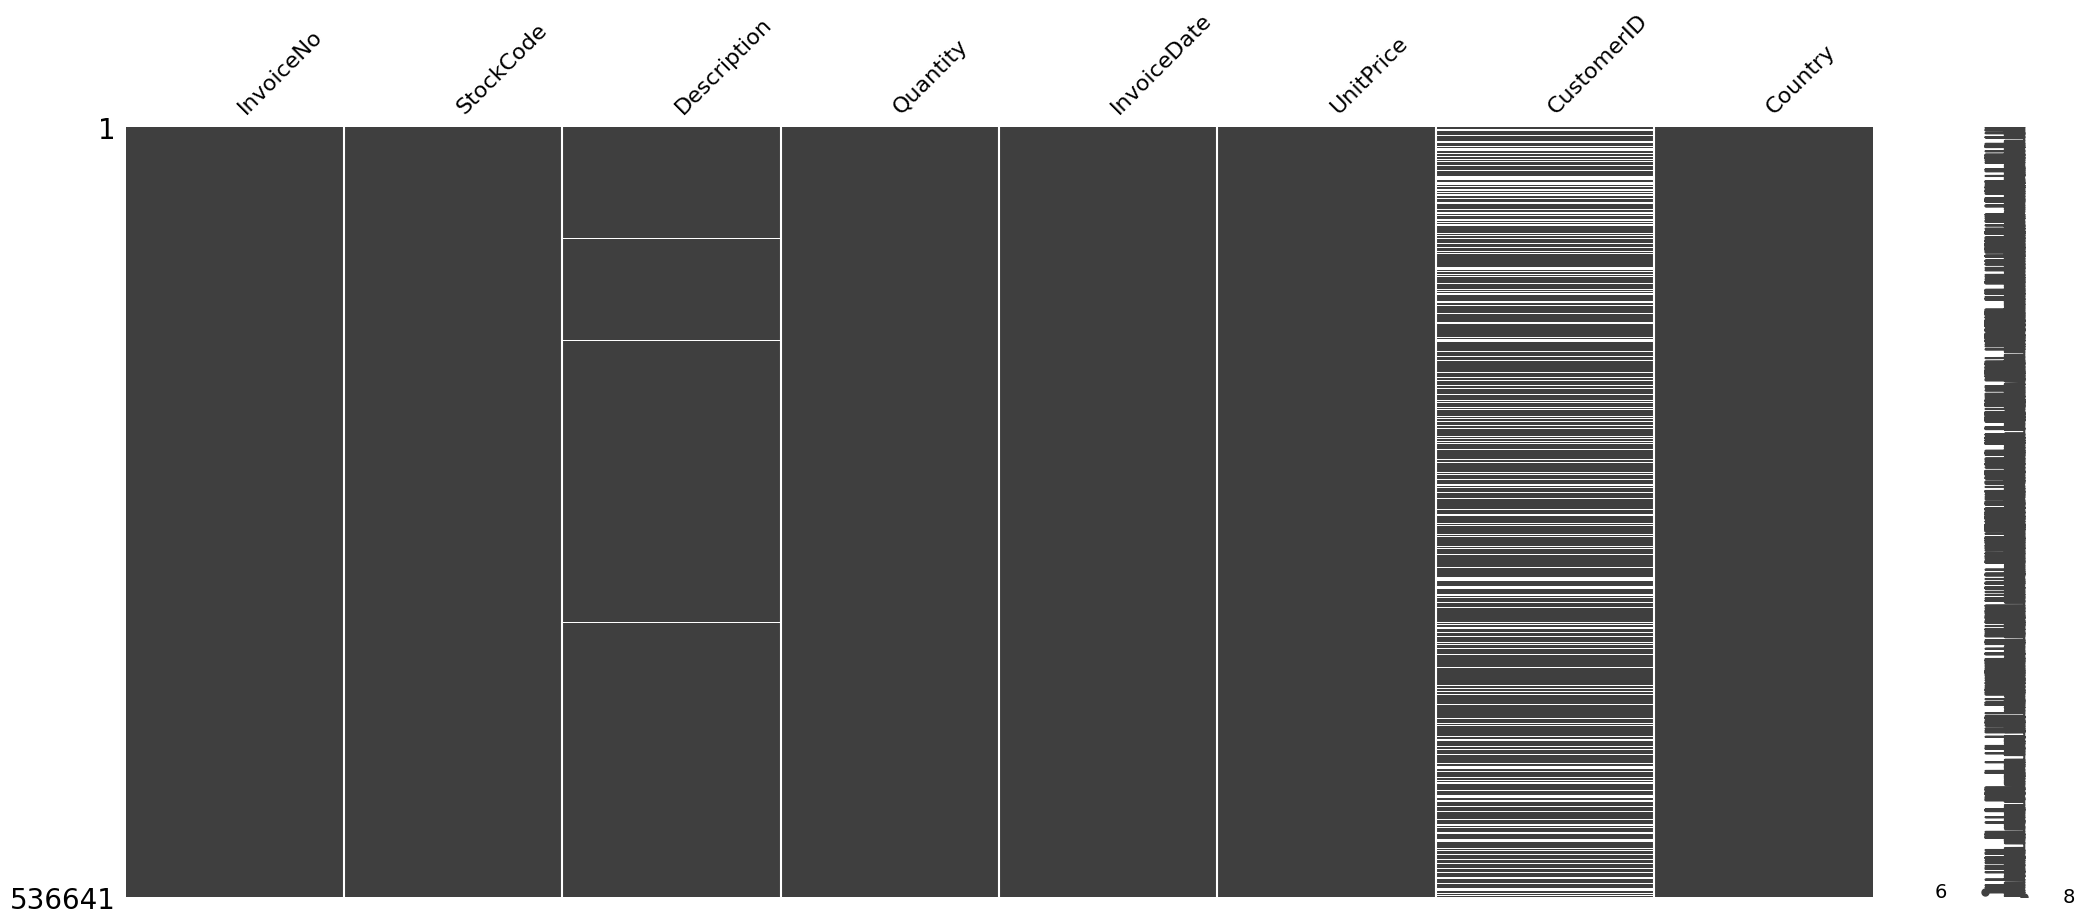

In [11]:
msno.matrix(df1)
plt.show()

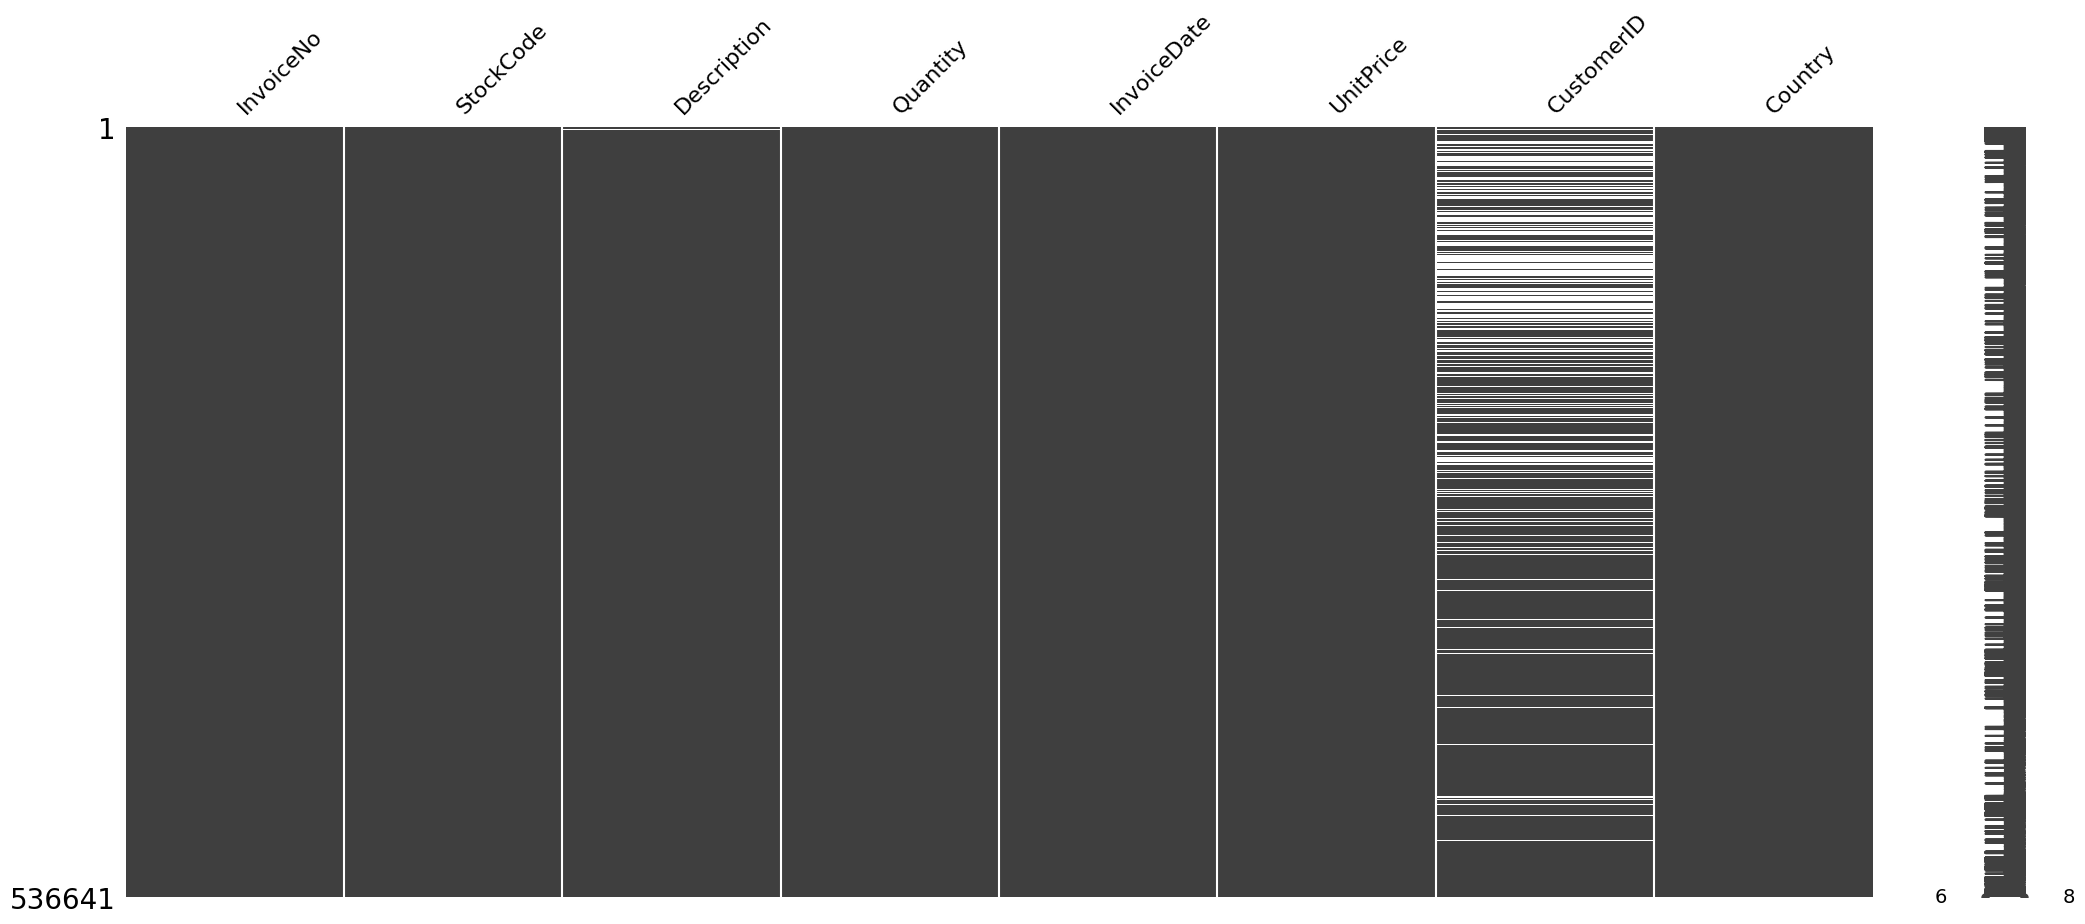

In [12]:
msno.matrix(df1.sort_values(by='Quantity'))
plt.show()

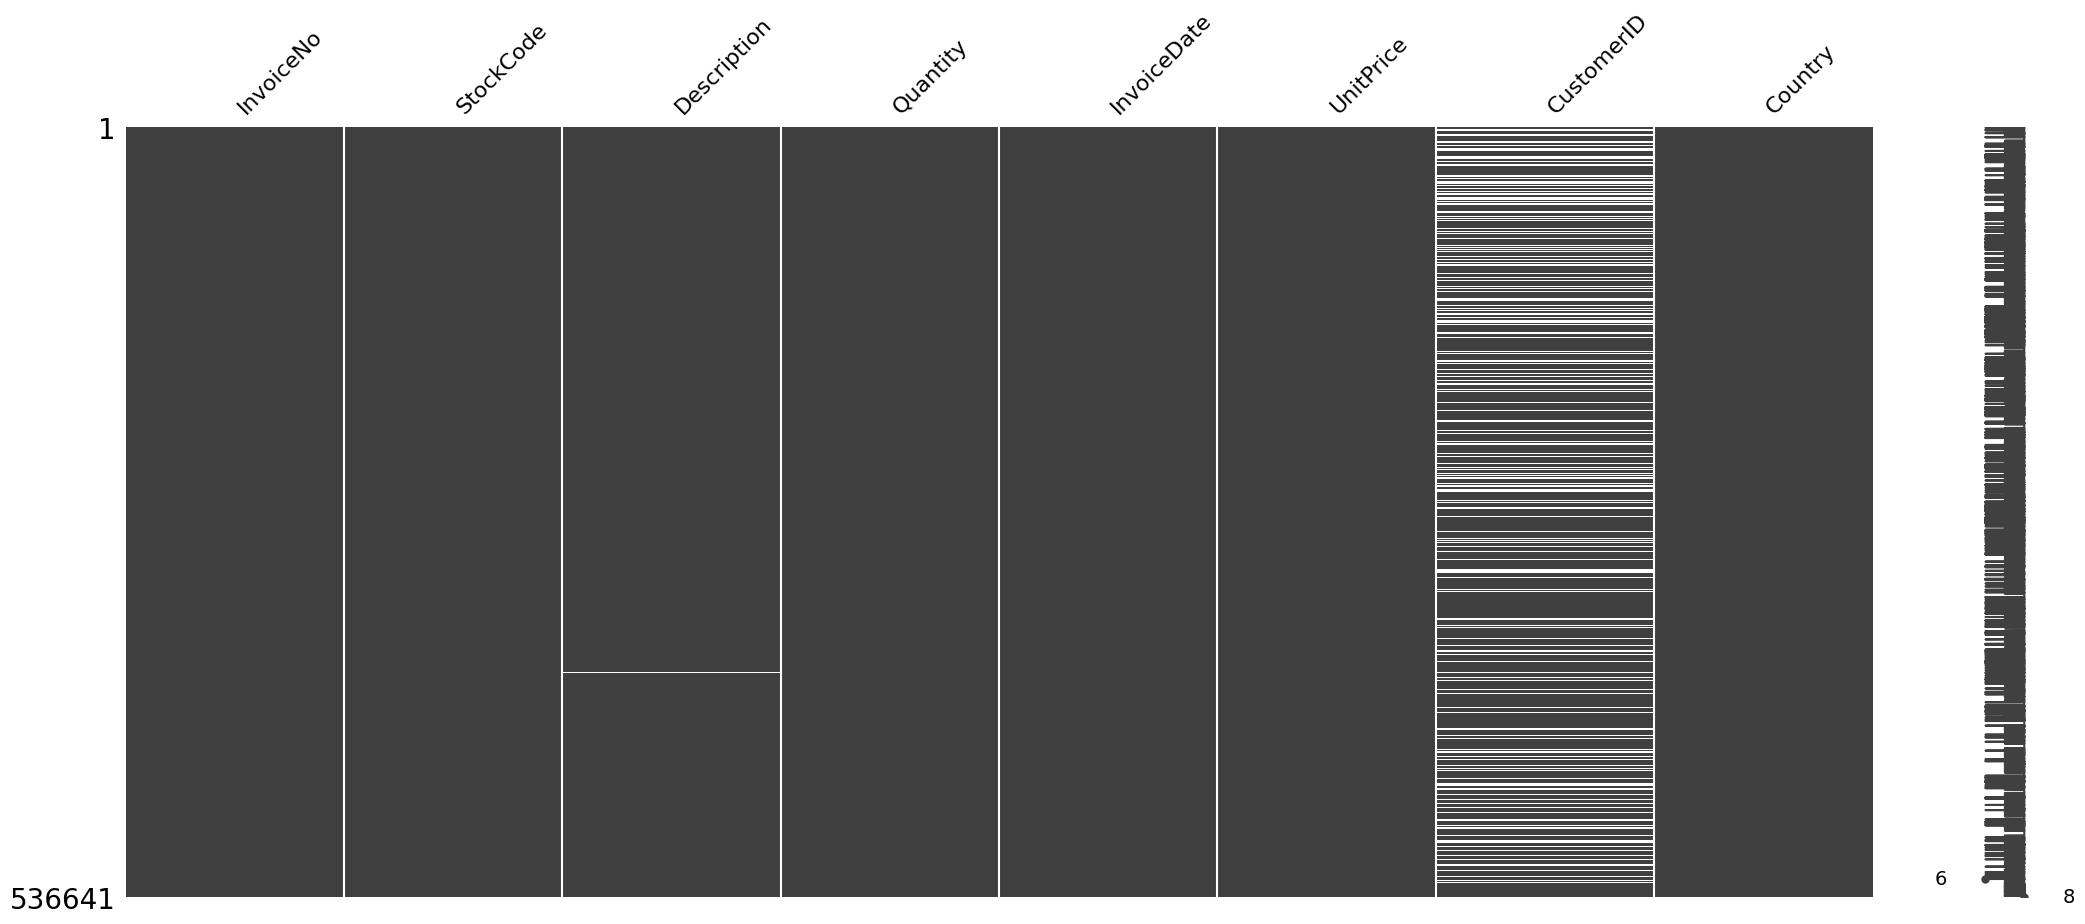

In [13]:
msno.matrix(df1.sort_values(by='InvoiceNo'))
plt.show()

***observation*** The missing values in Client ID are aproximately uniformly distributed along categories. Description are not missing at random, appear with low quantities and correlatives invoice Numbers

In [14]:
print('The total number of rows are: '+str(len(df1)) +'\n')
df1.isna().sum()

The total number of rows are: 536641



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### Dealing with NaN Values in Description Column 

In [15]:
df1['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: Description, dtype: int64

In [16]:
df1[df1['Description'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


In [17]:
df1[df1['Description'].isna()]['CustomerID'].value_counts()

Series([], Name: CustomerID, dtype: int64)

***Observation:***
In every file where Description is missing ClientID is also missing

In [18]:
df1[df1['Description'].isna()]['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

***Observation:***
In every file where Description is missing UnitPrice is zero

***Conclusion:*** The data dont have enought information to complete description column. Besides where decription is NaN "UnitPrice" is always 0. So I will drop the NaN values in that column

In [19]:
df1.dropna(subset=['Description'],inplace=True)

### Dealing with zero or negative prices 

In [20]:
df1[df1['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,12/3/10 12:08,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,12/3/10 12:08,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,12/3/10 16:50,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
13217,537425,84968F,check,-20,12/6/10 15:35,0.0,NaN,United Kingdom


In [21]:
# Some of the missing values of CustomerID also have prices that have zero as a value. 
# We arent interested so we drop all files with UnitPrice=0

df1=df1[df['UnitPrice']>0]

In [22]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,534129.000000,534129.000000,401564.000000
mean,9.916818,4.695864,15281.266797
std,216.452113,95.079189,1713.978947
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.100000,15145.000000
75%,10.000000,4.130000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

### Dealing with irrevant stock Codes 

List of Short Codes (codes with less than 5 fields)

In [24]:
Short_codes=df1[df1['StockCode'].str.len() <5]['StockCode'].unique()
Short_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'S', 'm', 'PADS', 'B', 'CRUK'],
      dtype=object)

Filtering the data showing only the "Short" StockCodes

In [25]:
df1[df1['StockCode'].isin(Short_codes)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/10 8:45,18.00,12583.0,France
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/10 13:04,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,12/1/10 14:05,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/11 10:26,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/11 11:59,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/11 12:09,18.00,12526.0,Germany


Descriptions Associated with Short codes

In [26]:
df1[df1['StockCode'].isin(Short_codes)]['Description'].unique()

array(['POSTAGE', 'Discount', 'CARRIAGE', 'DOTCOM POSTAGE', 'Manual',
       'SAMPLES', 'PADS TO MATCH ALL CUSHIONS', 'Adjust bad debt',
       'CRUK Commission'], dtype=object)

***observation:*** Stock Codes with less than 5 fields are associated with transactions out of our interest. 

***So I filter them out of the dataset***

In [27]:
df1=df1[df1['StockCode'].str.len() >= 5]

In [28]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,531307.000000,531307.000000,399668.000000
mean,9.959133,3.776108,15288.771766
std,216.986996,69.164366,1710.780951
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13959.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,17836.460000,18287.000000


In [29]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131639
Country             0
dtype: int64

## Dealing with Customer_id

In [30]:
df1['CustomerID'].isna().sum()

131639

Different UnitPrices when Customer_id is null

In [31]:
df1[df1['CustomerID'].isna()][['UnitPrice']].describe()

,UnitPrice
count,131639.000000
mean,6.411693
std,138.701755
min,0.060000
25%,1.630000
50%,3.290000
75%,5.400000
max,17836.460000


***I'm going to drop the files with null values of Customer_id for RFM and Cohort analysis***

***Important:*** Because Cluster analysis needs to group customers, and consecuently we need the Customer_id in all the cases. Because of that I´m going to drop all null values of Customer_id. The number of null values are a lot but its no way to infer the Customer_id from other columns, and besides the number of remaining rows is still significant
For other types of analysis it wouldnt be a good practice to drop such a quantity of rows and other solutions had to be taken on account.

In [32]:
df1.dropna(subset=['CustomerID'],inplace=True)

In [33]:
print('The current lenght of dataset is:' + str(len(df1)))
df1.isna().sum()

The current lenght of dataset is:399668


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Dealing with cancelled Orders

In [34]:
df1[df1['InvoiceNo'].str.contains('C')].sort_values('Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/10 14:23,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/11 13:08,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/11 13:08,1.85,15749.0,United Kingdom


In [35]:
df1[abs(df1['Quantity'])>10000].head(30).sort_values('StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446.0,United Kingdom


***Observation*** It appears that the cancelled Quantities (with minus sign) have an associated Invoice with the same unit price, Stock, CustomerID and description

***Separation of Cancelled Orders in a different dataset***

In [36]:
df_cancelled=df1[df1['InvoiceNo'].str.contains('C')]
df_cancelled['Quantity']=-df_cancelled['Quantity']
df_cancelled.sort_values('Quantity',ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:17,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,12/2/10 14:23,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:08,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,2000,4/18/11 13:08,1.85,15749.0,United Kingdom


In [37]:
df_cancelled.shape

(8506, 8)

***df2 is a dataset where the "C" orders are filtered out***

In [38]:
df2=df1[~df1['InvoiceNo'].str.contains('C')]

In [39]:
print(df2.shape)
df2.head()

(391162, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


***Im going to perform a difference of the two datasets in order to clean the dataset of orders that were cancelled***

In [40]:
subset_join=['StockCode','Description','Quantity','UnitPrice','CustomerID']
aux = df2.merge(df_cancelled, on=subset_join,  how='left', indicator=True)
df3=aux[aux._merge=='left_only']
df_final=df3.drop(columns=['InvoiceNo_y','InvoiceDate_y','Country_y','_merge'],axis=1)

In [41]:
df_final.columns=df2.columns
df_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
391437,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
391438,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
391439,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
391440,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [42]:
df_final.describe()

,Quantity,UnitPrice,CustomerID
count,386290.000000,386290.000000,386290.000000
mean,12.619591,2.849621,15294.279220
std,41.724736,4.138334,1709.637427
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.850000,15159.000000
75%,12.000000,3.750000,16794.000000
max,4800.000000,649.500000,18287.000000


## InvoiceDate to Datetime object

In [43]:
df_final['InvoiceDate']=pd.to_datetime(df_final['InvoiceDate'])
df_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cohort Analysis

## Specific Imports

In [44]:
from datetime import datetime,date, timedelta

## Preprocessing

In [45]:
df_cohort=df_final.copy()

***Functions Definition***

In [46]:
def get_month(x): 
    """ returns year and month of a datetime object"""
    return datetime(x.year, x.month, 1)

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day



In [47]:
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].apply(get_month)
grouping = df_cohort.groupby('CustomerID')['InvoiceMonth']
df_cohort['CohortMonth'] = grouping.transform('min')
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [48]:
df_cohort['InvoiceMonth'].dtype

dtype('<M8[ns]')

In [49]:
invoice_year, invoice_month, _ = get_date_int(df_cohort, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df_cohort, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_cohort['CohortIndex'] = years_diff * 12 + months_diff + 1
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [50]:
df_cohort.shape

(386290, 11)

## Retention Rates Calculation 

In [51]:
grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='CustomerID')


In [52]:
# Store the first column as cohort sizes 
cohort_sizes = cohort_counts.iloc[:,0]

# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.4,32.2,38.1,35.7,39.6,35.9,34.5,35.2,39.3,37.3,49.9,26.4
2011-01-01,100.0,21.3,26.8,23.2,32.4,28.7,25.1,23.9,30.0,32.6,36.7,11.8,NaN
2011-02-01,100.0,18.6,18.6,28.3,27.0,24.4,25.5,26.8,24.4,30.2,6.8,NaN,NaN
2011-03-01,100.0,14.4,24.9,19.3,22.4,16.7,26.2,23.1,27.8,8.9,NaN,NaN,NaN
2011-04-01,100.0,21.1,20.4,21.1,19.7,22.7,21.1,26.1,7.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.4,17.3,17.3,21.1,22.9,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.8,26.6,23.2,32.4,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.2,20.4,22.6,27.4,11.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.0,24.1,24.7,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


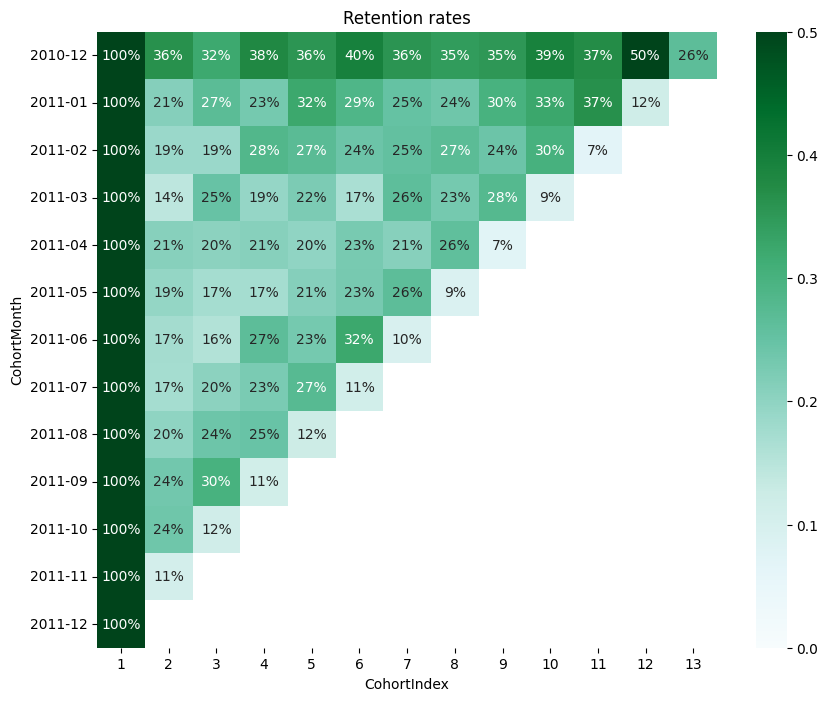

In [53]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
retention.index=retention.index.strftime('%Y-%m')
sns.heatmap(data = retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

***Observations***
* The Retention rate decays more for months after 2011-01 for equal index
* There is an abnormal retention rate of 50% for index 12 after 2010-12. Maybe it is related to a seasonality effect that its worth to research

# RFM Analysis

## Specific Imports

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## RFM analysis by Segmentation

In [55]:
### Setting the date of anallysis

In [56]:
snapshot_date = max(df_final.InvoiceDate) + timedelta(days=1)

### MoneraryValue Column Creation

In [57]:
# Creation of GrossIncome Column = pxQ
df_M= df_final.copy()
df_M['GrossIncome']=df_M['Quantity']*df_M['UnitPrice']
df_M.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GrossIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Creating Datamart with Recency-Frequency-Monetary Value Columns

***Grouping by CustomerID I will define the aggregating columns according to point 1 insights*** 

In [58]:
datamart = df_M.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'GrossIncome': 'sum'})

***Renaming Columns according to conventions***

In [59]:
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'GrossIncome': 'MonetaryValue'}, inplace=True)

In [60]:
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,19,72,1457.55
12350.0,310,16,294.40
12352.0,36,62,1125.28


### Building RFM segments - Quantile analysis - Scores

In [61]:
# Create labels for Recency, Frequency and Monetary Value
r_labels = range(3, 0, -1); 
f_labels = range(1, 4)
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
datamart['R']= pd.qcut(datamart['Recency'], q=3, labels=r_labels)
datamart['F']= pd.qcut(datamart['Frequency'], q=3, labels=f_labels)
datamart['M']= pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12347.0    9
12348.0    7
12349.0    9
12350.0    3
12352.0    6
Name: RFM_Score, dtype: int64


### Creating custom segments basing on scores

In [62]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

In [63]:
# Apply the function to get the levels
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12347.0,2,182,4310.00,3,3,3,9,Top
12348.0,75,27,1437.24,2,2,3,7,Middle
12349.0,19,72,1457.55,3,3,3,9,Top
12350.0,310,16,294.40,1,1,1,3,Low
12352.0,36,62,1125.28,2,2,2,6,Middle


### Analysing Custom levels

In [64]:
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  	# Return the size of each segment
    'MonetaryValue': ['mean','count' ] 
}).round(1)

In [65]:
rfm_level_agg.head()

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         191.0      14.4         249.0  1211
Middle       67.6      69.3        1296.7  2429
Top           9.8     293.7        7048.7   683

### Visualizing Custom levels counts

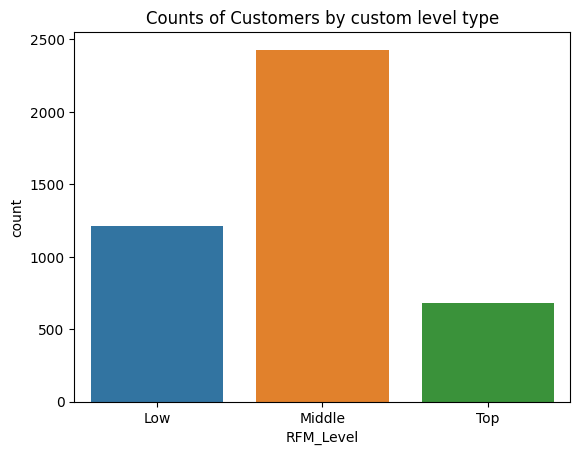

In [66]:
level_counts= rfm_level_agg['MonetaryValue'][['count']]
g= sns.barplot(data= level_counts, x = level_counts.index,y='count')
g.set_title('Counts of Customers by custom level type')
plt.show()

## RFM Analysis by KMeans

### Preprocessing

***Selection of the relevant columns***

In [67]:
data=datamart[['Recency','Frequency','MonetaryValue']]

***Exploring distributions***

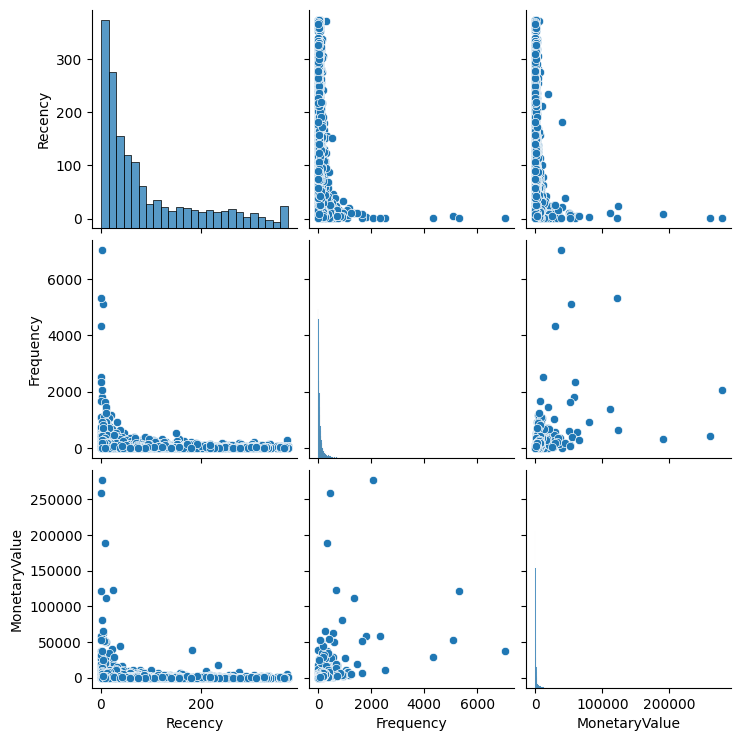

In [68]:
sns.pairplot(data)
plt.show()

***Observation:*** Monetary Value and Frequency are highly skewed to the right

#### Apply logaritmic transformation to sort out skewness

In [69]:
data_log=np.log(data)

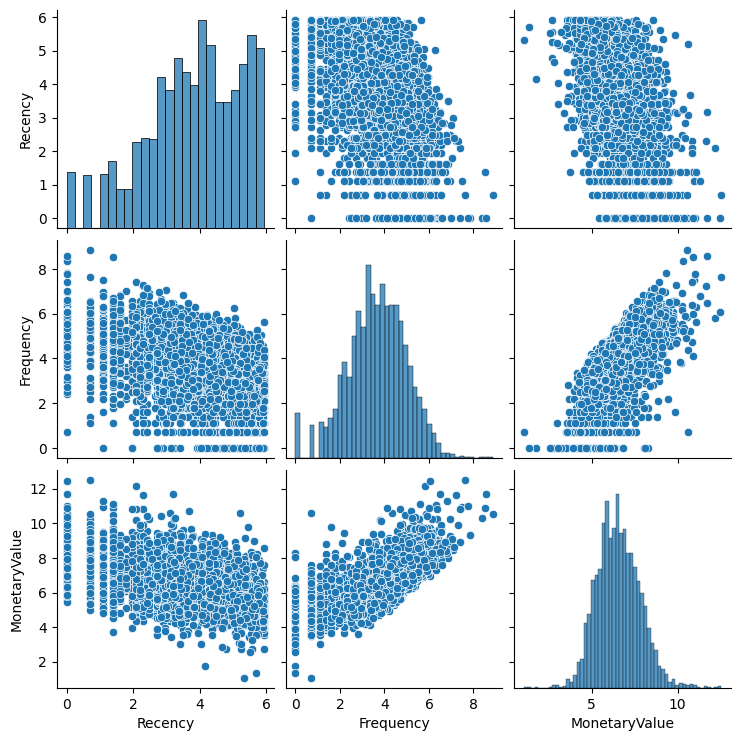

In [70]:
sns.pairplot(data_log)
plt.show()

#### Scale the features

In [71]:
data_log.describe()

,Recency,Frequency,MonetaryValue
count,4323.000000,4323.000000,4323.000000
mean,3.772670,3.658797,6.556588
std,1.433705,1.323588,1.252683
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.708123
50%,3.931826,3.688879,6.485520
75%,4.973274,4.579839,7.384464
max,5.924256,8.859221,12.534963


***Kmeans works well when the mean and std dev are about the same. So I will scale the features***

In [72]:
Scaler=StandardScaler()

In [73]:
Values_scaled= Scaler.fit_transform(data_log)

In [74]:
X=pd.DataFrame(Values_scaled)
X.columns= data.columns

In [75]:
X.describe().round(3)

,Recency,Frequency,MonetaryValue
count,4323.000,4323.000,4323.000
mean,-0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-2.632,-2.765,-4.385
25%,-0.615,-0.624,-0.677
50%,0.111,0.023,-0.057
75%,0.838,0.696,0.661
max,1.501,3.929,4.773


### Optimal Cluster number with elbow method

In [76]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)

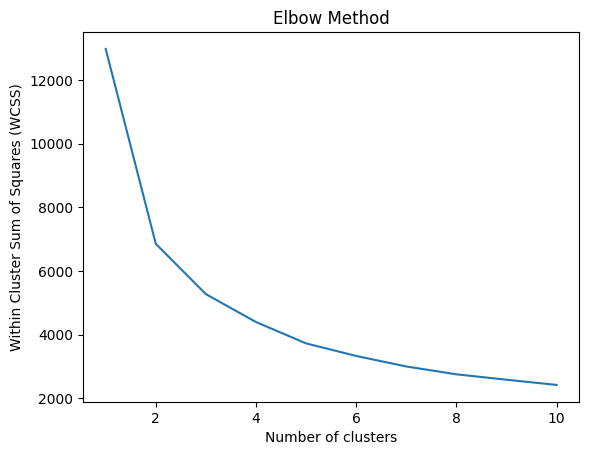

In [77]:
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

### Running KMeans

In [78]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

# Compute k-means clustering on pre-processed data
kmeans.fit(X)

# Extract cluster labels from labels
cluster_labels=kmeans.labels_

In [79]:
data_k3=data.copy()
data_k3=data_k3.assign(Cluster=cluster_labels)

### RFM Summary Statistics for each Cluster 

In [80]:
data_k3.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'],}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         170.0      15.0         284.0  1533
1          13.0     257.0        6154.0   943
2          70.0      66.0        1097.0  1847

### Visualizations: Snake Plot and Relative importance

***Snake Plot***

In [81]:
# Data Frame of normalized Data

data_normalized = pd.DataFrame(Values_scaled, index= data.index, columns= data.columns)
data_normalized['Cluster']= data_k3['Cluster']

In [82]:
# Transform X (the normalized data to a Long format)

data_melt = pd.melt(data_normalized.reset_index(),id_vars=['CustomerID','Cluster'],value_vars=['Recency','Frequency','MonetaryValue'],var_name='Attribute',
                    value_name='Value')
data_melt.head()

,CustomerID,Cluster,Attribute,Value
0,12347.0,1,Recency,-2.148196
1,12348.0,2,Recency,0.380051
2,12349.0,2,Recency,-0.577752
3,12350.0,0,Recency,1.369968
4,12352.0,2,Recency,-0.131947


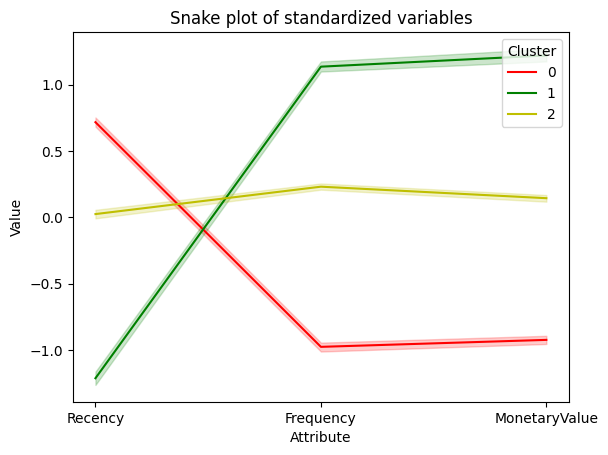

In [83]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt, palette=['r','g','y'])
plt.show()


***Relative Importance***

In [84]:
cluster_avg = data_k3.groupby(['Cluster']).mean()
population_avg = data.mean()
relative_imp = cluster_avg / population_avg - 1

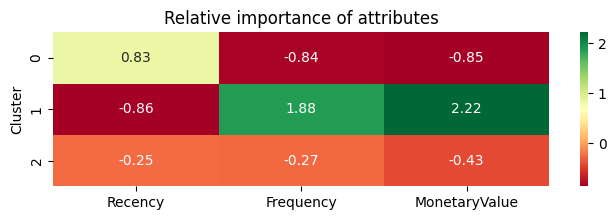

In [85]:
# Plot heatmap
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


* Cluster 1: Its the top segment: Low Recency-High Frequency and High Monetary Value. The Mayor relative difference its in Monetary Value in this segment. Its the segment with the less costumers
* Cluster 2: Its the Middle segment. Frequency, Recency and Monetary are quite balanced in the middle.Its the segment with most customers
* Cluster 3: Its the low segment

# Cohort Analysis by segment

***In this chapter I´m going to combine the cohort analysis of chapter 4 to the Clustering in chapter 5 in order to know retention rates by segments***
***The segments are Top for cluster 1, Mid for cluster 2, and low for cluster 0***

## Preparing data

***Segmenting Cohorts in three: one for each cluster (segment)***

In [86]:
Top_cust= data_k3[data_k3['Cluster']==1].index
Mid_cust= data_k3[data_k3['Cluster']==2].index
Low_cust= data_k3[data_k3['Cluster']==0].index

In [87]:
df_cohort_Top= df_cohort[df_cohort['CustomerID'].isin(Top_cust)]
df_cohort_Mid= df_cohort[df_cohort['CustomerID'].isin(Mid_cust)]
df_cohort_Low= df_cohort[df_cohort['CustomerID'].isin(Low_cust)]

***Function for Retention_rates return***

In [88]:
def retention_analysis(df_cohort_):   
    grouping_ = df_cohort_.groupby(['CohortMonth', 'CohortIndex'])
    cohort_data_ = grouping_['CustomerID'].apply(pd.Series.nunique)
    cohort_data_ = cohort_data_.reset_index()
    cohort_counts_ = cohort_data_.pivot(index='CohortMonth',
    columns='CohortIndex',
    values='CustomerID')
    
    # Store the first column as cohort sizes 
    cohort_sizes_ = cohort_counts_.iloc[:,0]

    # Divide all values in the cohort_counts table by cohort_sizes
    retention_ = cohort_counts_.divide(cohort_sizes_, axis=0)

    # Review the retention table
    return retention_.round(3) * 100

***Function for plotting retention rates***

In [89]:
def retention_graph(ret,title,vmax):
    plt.figure(figsize=(10, 8))
    plt.title(title)
    ret.index= ret.index.strftime('%Y-%m')
    sns.heatmap(data = ret,annot = True,fmt='.1f',vmin = 0.0,vmax = vmax,cmap = 'BuGn')
    plt.show()



## Retention Rates by segment graphs

In [90]:
retention_Top = retention_analysis(df_cohort_Top)
retention_Mid = retention_analysis(df_cohort_Mid)
retention_Low = retention_analysis(df_cohort_Low)

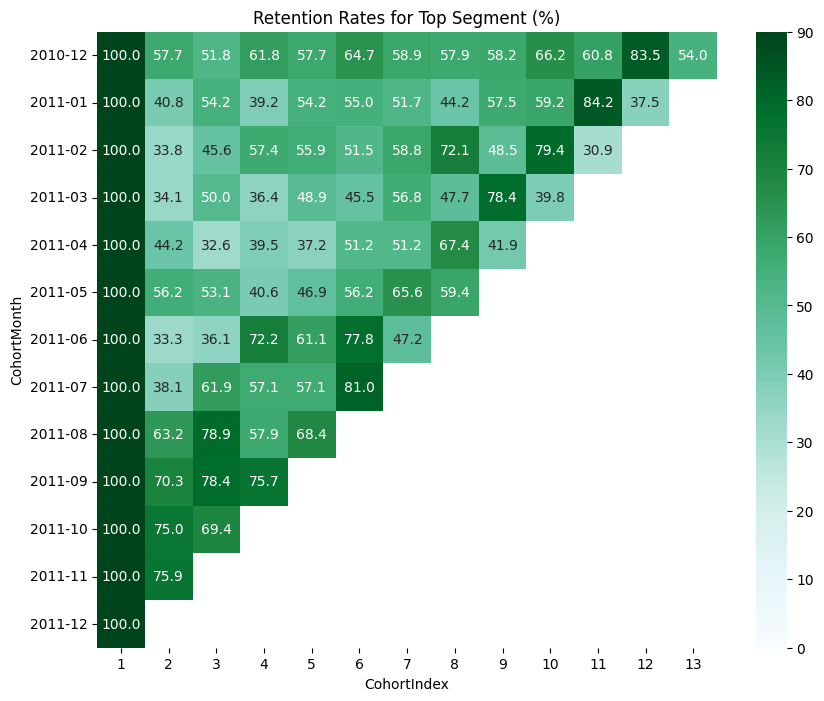

In [91]:
retention_graph(retention_Top,'Retention Rates for Top Segment (%)',90)

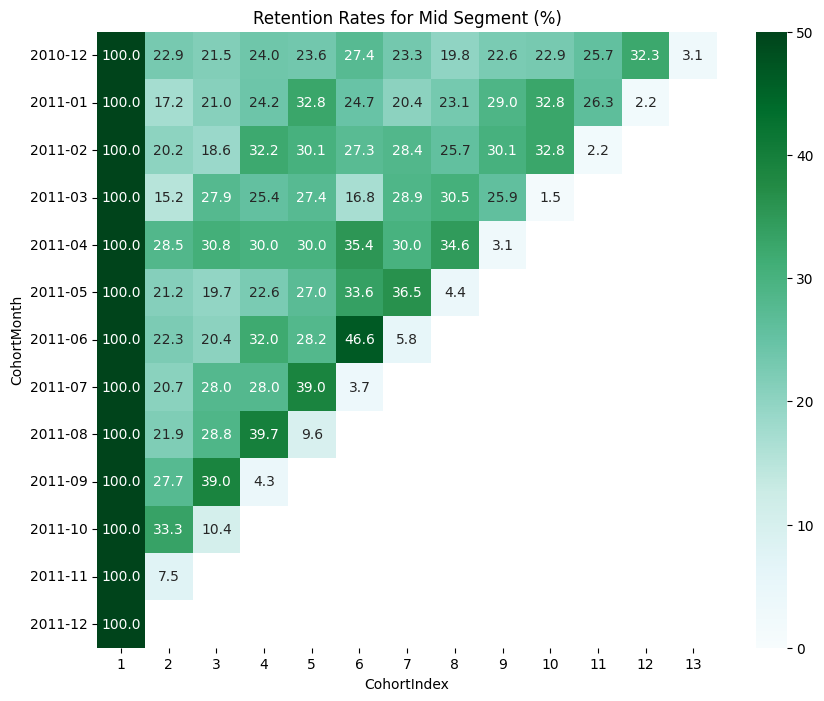

In [92]:
retention_graph(retention_Mid,'Retention Rates for Mid Segment (%)',50)

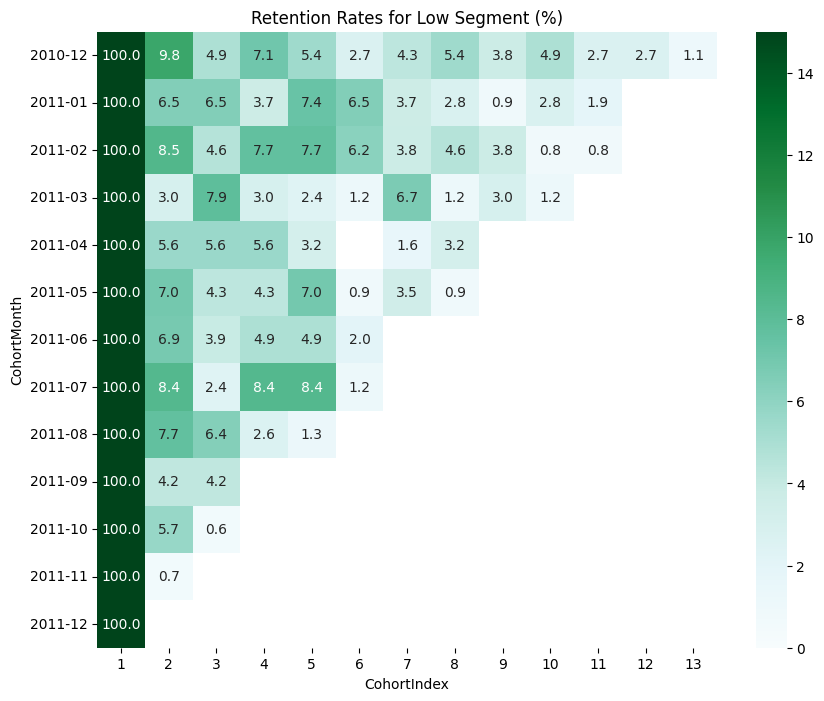

In [93]:
retention_graph(retention_Low,'Retention Rates for Low Segment (%)',15)